<a href="https://www.kaggle.com/code/shaheerhussain/detailed-usd-pkr-1992-2023-analysis?scriptVersionId=147459428" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session 

/kaggle/input/usd-to-pkr/USD_PKR Historical Data(3).csv
/kaggle/input/usd-to-pkr/USD_PKR Historical Data(4).csv


In [2]:
db = pd.read_csv("/kaggle/input/usd-to-pkr/USD_PKR Historical Data(3).csv",parse_dates=['Date'])
df = pd.read_csv("/kaggle/input/usd-to-pkr/USD_PKR Historical Data(4).csv",parse_dates=['Date'])

print(db)
print(df)
# Merge the two datasets based on a common column
result = pd.concat([df,db])
result.reset_index(inplace=True)
result = result.drop('index', axis=1)
print(result)

           Date   Price    Open    High     Low  Vol. Change %
0    2011-04-05  85.350  85.100  85.460  84.950   NaN    0.18%
1    2011-04-04  85.200  85.150  85.630  85.000   NaN   -0.24%
2    2011-04-02  85.405  85.220  85.405  84.930   NaN    0.12%
3    2011-04-01  85.300  85.300  85.530  84.950   NaN   -0.12%
4    2011-03-31  85.400  85.100  85.430  84.400   NaN    0.23%
...         ...     ...     ...     ...     ...   ...      ...
4994 1992-02-11  24.802  24.802  24.802  24.802   NaN    0.00%
4995 1992-02-10  24.802  24.802  24.802  24.802   NaN    0.00%
4996 1992-02-07  24.802  24.802  24.802  24.802   NaN    0.00%
4997 1992-02-06  24.802  24.802  24.802  24.802   NaN    0.00%
4998 1992-02-05  24.802  24.802  24.802  24.802   NaN    0.00%

[4999 rows x 7 columns]
           Date   Price     Open     High     Low   Vol. Change %
0    2023-03-16  278.75  282.875  283.250  278.75  0.01K   -1.50%
1    2023-03-15  283.00  282.125  283.375  279.50  0.02K    2.30%
2    2023-03-14  276.

In [3]:
result.describe()

,Price,Open,High,Low
count,8668.000000,8668.000000,8668.000000,8668.000000
mean,83.744616,83.703017,83.970978,83.481778
std,44.989027,45.016564,45.270423,44.735762
min,24.762000,24.762000,24.762000,24.762000
25%,53.987500,53.977500,53.987500,53.977500
50%,77.665000,77.500000,78.310000,76.950000
75%,104.755000,104.710000,104.825000,104.620000
max,283.000000,282.875000,284.000000,279.500000


In [4]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8668 entries, 0 to 8667
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      8668 non-null   datetime64[ns]
 1   Price     8668 non-null   float64       
 2   Open      8668 non-null   float64       
 3   High      8668 non-null   float64       
 4   Low       8668 non-null   float64       
 5   Vol.      1090 non-null   object        
 6   Change %  8668 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 474.2+ KB


In [5]:
print(result.isna().sum())

Date           0
Price          0
Open           0
High           0
Low            0
Vol.        7578
Change %       0
dtype: int64


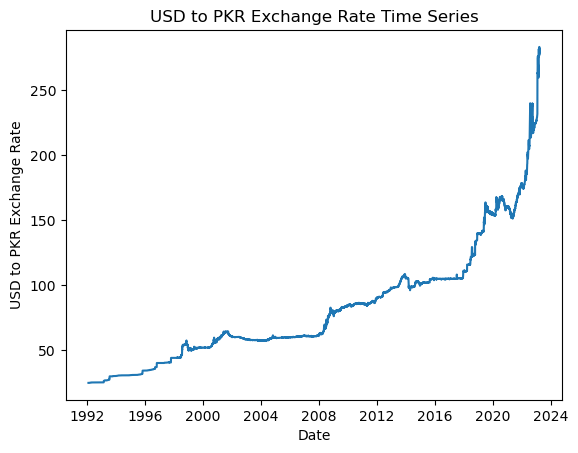

In [6]:
sns.lineplot(data=result, x="Date", y='Price')
plt.xlabel('Date')
plt.ylabel('USD to PKR Exchange Rate')
plt.title('USD to PKR Exchange Rate Time Series')
plt.show()

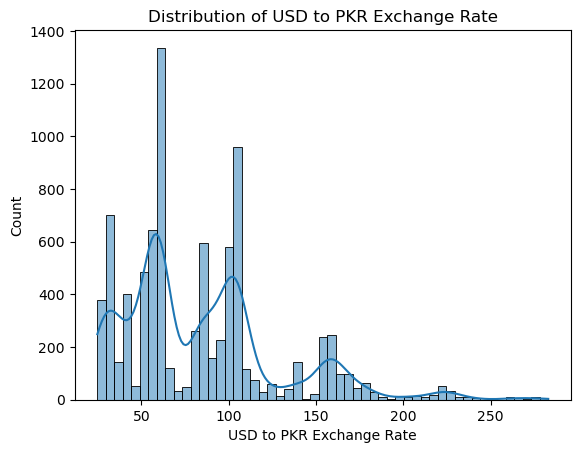

In [7]:
sns.histplot(data=result, x='Price', kde=True)
plt.xlabel('USD to PKR Exchange Rate')
plt.title('Distribution of USD to PKR Exchange Rate')
plt.show()

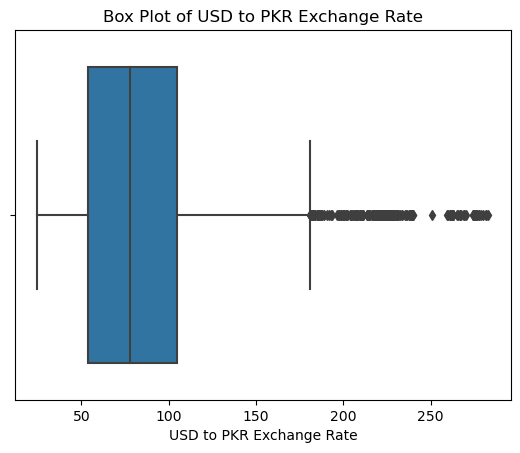

In [8]:
# Plot the box plot of the USD to PKR exchange rate
sns.boxplot(data=result, x='Price')
plt.xlabel('USD to PKR Exchange Rate')
plt.title('Box Plot of USD to PKR Exchange Rate')
plt.show()

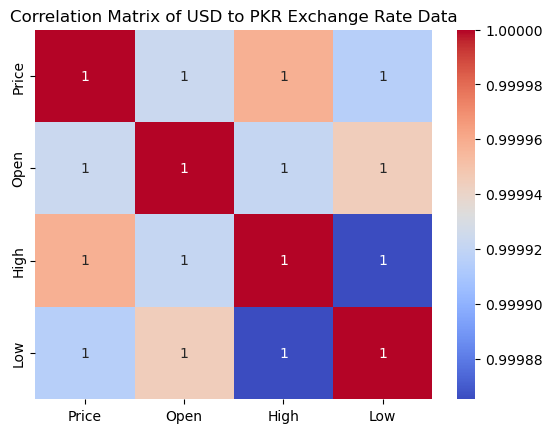

In [9]:
# Plot the correlation matrix of the exchange rate data
corr_matrix = result.corr()
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of USD to PKR Exchange Rate Data')
plt.show()


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


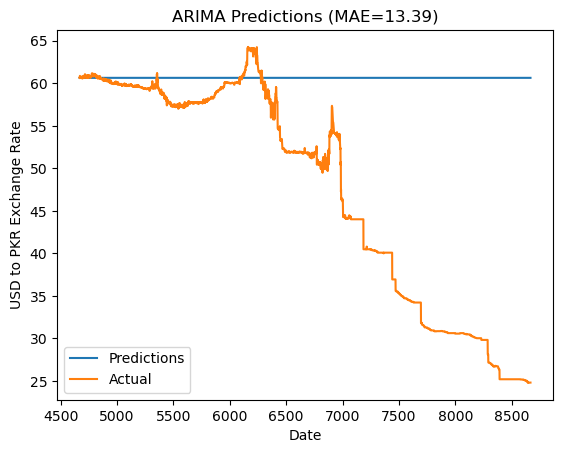

In [10]:
# Import the ARIMA library
from statsmodels.tsa.arima.model import ARIMA

# Split the data into train and test sets
train = result['Price'].iloc[:-4000]
test = result['Price'].iloc[-4000:]

# Instantiate the ARIMA model
model = ARIMA(train, order=(1,1,1))

# Fit the model to the training data
model_fit = model.fit()

# Make predictions for the test data
predictions = model_fit.forecast(steps=len(test))

# Compute the mean absolute error of the predictions
mae = np.mean(abs(predictions - test))

# Plot the predicted and actual exchange rates
plt.plot(test.index, predictions, label='Predictions')
plt.plot(test.index, test, label='Actual')
plt.xlabel('Date')
plt.ylabel('USD to PKR Exchange Rate')
plt.title(f'ARIMA Predictions (MAE={mae:.2f})')
plt.legend()
plt.show()


In [11]:
# # !pip install fbprophet
# # Import the Prophet library
# import fbprophet
# # Prepare the data for Prophet
# prophet_df = result[['Date', 'Price']].reset_index().rename(columns={'Date': 'ds', 'Price': 'y'})

# # Instantiate the Prophet model
# model = Prophet()

# # Fit the model to the data
# model.fit(prophet_df)

# # Generate future dates to make predictions for
# future = model.make_future_dataframe(periods=365)

# # Make predictions for the future dates
# predictions = model.predict(future)

# # Plot the predicted and actual exchange rates
# model.plot(predictions)
# plt.xlabel('Date')
# plt.ylabel('USD to PKR Exchange Rate')
# plt.title('Prophet Model Predictions')
# plt.show()

#Volatility Analysis:
You can analyze the high and low values to understand the volatility of the exchange rate. A high volatility indicates that the exchange rate is fluctuating a lot, while a low volatility indicates stability.

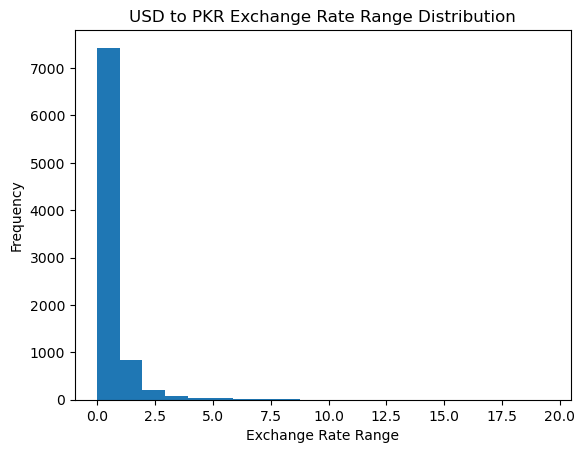

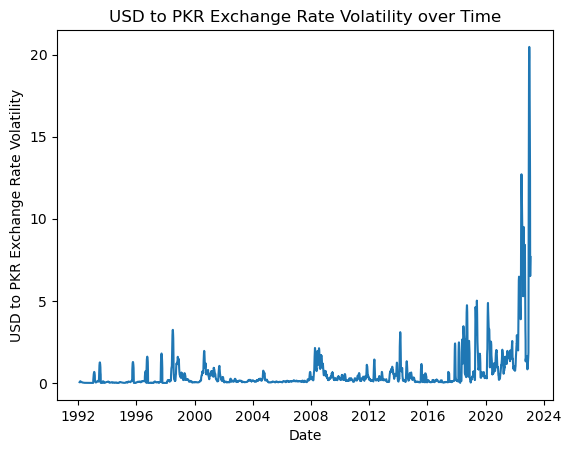

In [12]:
# Compute the range of the exchange rate
result['Range'] = result['High'] - result['Low']

# Plot the distribution of the range
plt.hist(result['Range'], bins=20)
plt.xlabel('Exchange Rate Range')
plt.ylabel('Frequency')
plt.title('USD to PKR Exchange Rate Range Distribution')
plt.show()

# Compute the rolling standard deviation of the exchange rate
result['Rolling Std'] = result['Price'].rolling(window=30).std()

# Plot the rolling standard deviation of the exchange rate
plt.plot(result['Date'], result['Rolling Std'])
plt.xlabel('Date')
plt.ylabel('USD to PKR Exchange Rate Volatility')
plt.title('USD to PKR Exchange Rate Volatility over Time')
plt.show()

# Trading Strategy:
You can use the exchange rate data to develop a trading strategy. For example, you can create a simple moving average crossover strategy where you buy when the short-term moving average crosses above the long-term moving average, and sell when the short-term moving average crosses below the long-term moving average.


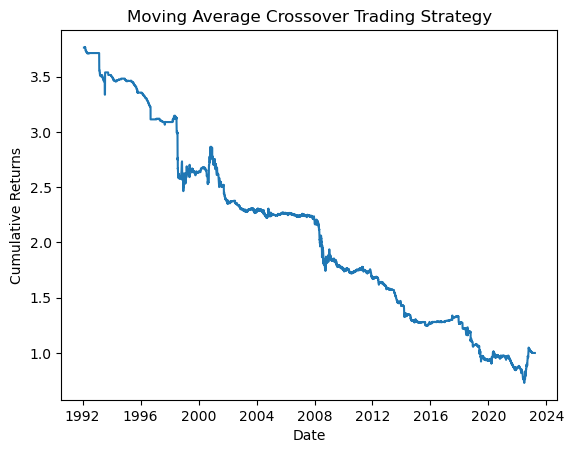

In [13]:
# Compute the short-term and long-term moving averages
result['Short MA'] = result['Price'].rolling(window=20).mean()
result['Long MA'] = result['Price'].rolling(window=50).mean()

# Create a new column for the trading signals
result['Signal'] = 0
result.loc[result['Short MA'] > result['Long MA'], 'Signal'] = 1
result.loc[result['Short MA'] < result['Long MA'], 'Signal'] = -1

# Compute the returns of the trading strategy
result['Returns'] = result['Price'].pct_change() * result['Signal'].shift(1)

# Compute the cumulative returns of the trading strategy
result['Cumulative Returns'] = (1 + result['Returns']).cumprod()

# Plot the cumulative returns of the trading strategy
plt.plot(result['Date'], result['Cumulative Returns'])
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Moving Average Crossover Trading Strategy')
plt.show()

# Outlier Analysis:
You can analyze the data for outliers and anomalies, which can be caused by unexpected events such as financial crises or political instability.

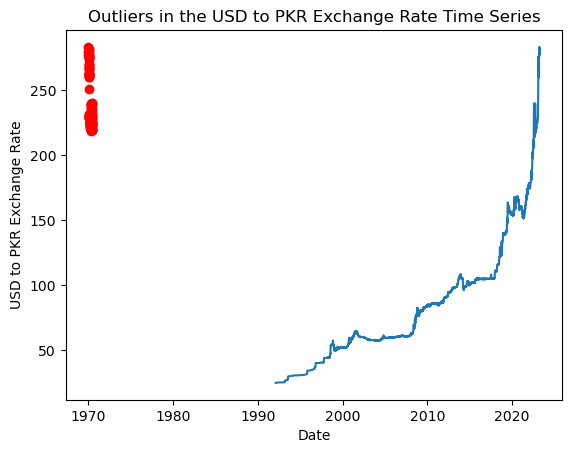

In [14]:
# Compute the z-scores of the exchange rate
from scipy.stats import zscore
result['Z-Score'] = zscore(result['Price'])

# Identify the outliers using a threshold value
outliers = result.loc[abs(result['Z-Score']) > 3, 'Price']

# Plot the outliers
plt.plot(result['Date'], result['Price'])
plt.scatter(outliers.index, outliers.values, color='red')
plt.xlabel('Date')
plt.ylabel('USD to PKR Exchange Rate')
plt.title('Outliers in the USD to PKR Exchange Rate Time Series')
plt.show()